In [4]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue
from scipy.optimize import fsolve

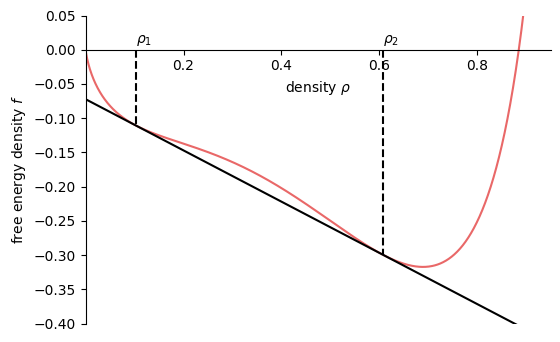

In [5]:
# Global parameters
kbt = 1 # --> all energy (f, a, ...) in units of k_B T
linear_coefficient = 2.5 # add a term linear in rho to f_vdw for a nicer plot
# this linear term has no impact on the conditions for phase coexistence

# Colors
grey = '#eeeeee' # light grey fill
line = '#e96868' # red line
nucleatn_color = '#6a8ba4' # dark blue for nucleation&growth
spinodal_color = '#BBDEF0' # light blue for spinodal decomposition

def f_vdw(rho, a, b):
    """
    Calculates the free energy density for a Van der Waals fluid.
    """
    return kbt*rho*(np.log(rho/(1-b*rho)) - 1) - a*rho**2 + linear_coefficient*kbt*rho

def f_vdw_prime(rho, a, b):
    """
    Calculates the derivative w.r.t. the density rho of the free energy
    density of a VdW fluid.
    """
    return kbt*np.log(rho/(1-b*rho)) + kbt*b*rho/(1-b*rho) - 2*a*rho + linear_coefficient*kbt

def conditions_for_coexistence(x, a, b):
    """
    Function that should be zero when phases coexist. A vector with
    one element mu1 - mu2, and one element p1 - p2.
    """
    rho1 = x[0]
    rho2 = x[1]
    mu1 = f_vdw_prime(rho1, a, b)
    mu2 = f_vdw_prime(rho2, a, b)
    f1 = f_vdw(rho1, a, b)
    f2 = f_vdw(rho2, a, b)
    mu_deficit = mu1 - mu2
    p_deficit  = rho1*mu1 - f1 - rho2*mu2 + f2
    return [mu_deficit, p_deficit]

def f_mix(rho_av, a, b):
    """
    Free energy density for a mixture of gas (density rho1) and liquid (density
    rho2). The gas and liquid densities (rho1 and rho2) are found numerically.
    """
    rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.7], args=(a,b))
    rho1 = rhosol[0]
    rho2 = rhosol[1]
    return f_vdw(rho1, a, b) + (f_vdw(rho2, a, b) - f_vdw(rho1, a, b))/(rho2-rho1) * (rho_av - rho1)

## Prepare all the graphs that are to be plotted
# Define the range of densities to plot
rho = np.linspace(0.001, 0.95, 1000)

# Set the parameters a and b
a = 4
b = 1

# Find the densities at which the gas and liquid phases coexist by solving
# numerically. If you use different a and b you might need to change the
# guesses, x0.
rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.8], args=(a,b))

## Make the plot
fig, ax = plt.subplots(figsize=(6,4))

# Put axes on the zeros
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove label at 0.0
ax.set_xticks([0.2, 0.4, 0.6, 0.8])

# Plot the graphs
ax.plot(rho, f_vdw(rho, a, b), color=line)
ax.plot(rho, f_mix(rho, a, b), 'k')

# Create markers rho1 and rho2
rho1_marker_y = np.linspace(0, f_vdw(rhosol[0], a, b), 10)
rho1_marker_x = np.ones(rho1_marker_y.shape)*rhosol[0]
ax.plot(rho1_marker_x, rho1_marker_y, 'k--')
rho2_marker_y = np.linspace(0, f_vdw(rhosol[1], a, b), 10)
rho2_marker_x = np.ones(rho2_marker_y.shape)*rhosol[1]
ax.plot(rho2_marker_x, rho2_marker_y, 'k--')
ax.text(rhosol[0], 0.01, r'$\rho_1$')
ax.text(rhosol[1], 0.01, r'$\rho_2$')

# Labels
ax.set_xlabel(r'density $\rho$'), ax.set_ylabel(r'free energy density $f$')

# Limits
ax.set_xlim([0, rho[-1]])
ax.set_ylim([-0.4, 0.05])

# Save graph to load in figure later (special Jupyter Book feature)
glue("free_energy_density", fig, display=False)

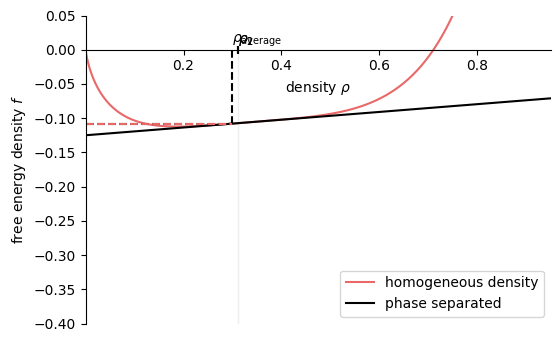

In [8]:
fig2, ax = plt.subplots(figsize=(6,4))

# Put axes on the zeros
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove label at 0.0
ax.set_xticks([0.2, 0.4, 0.6, 0.8])

# Grey area
ax.fill([rhosol[0], rhosol[0], rhosol[1], rhosol[1]],
        [0, -0.4, -0.4, 0],
        color=grey)

# Plot the graphs
ax.plot(rho, f_vdw(rho, a, b), color=line, label='homogeneous density')
ax.plot(rho, f_mix(rho, a, b), 'k', label='phase separated')

# Create markers for rho1 and rho2
ax.scatter(rhosol[0], 0, color='k', marker='|', zorder=10)
ax.scatter(rhosol[1], 0, color='k', marker='|', zorder=10)
ax.text(rhosol[0], 0.01, r'$\rho_1$', zorder=10)
ax.text(rhosol[1], 0.01, r'$\rho_2$', zorder=10)

# Create markers for rho_average
rhoavg = 0.3
rhoavg_marker_y = np.linspace(0, f_mix(rhoavg, a, b), 10)
rhoavg_marker_x = np.ones(rho1_marker_y.shape)*rhoavg
ax.plot(rhoavg_marker_x, rhoavg_marker_y, 'k--')
fmix_at_rhoavg = f_mix(rhoavg, a, b)
fvdw_at_rhoavg = f_vdw(rhoavg, a, b)
hline_x = np.linspace(0, rhoavg, 10)
mix_hline_y = np.ones(hline_x.shape)*fmix_at_rhoavg
vdw_hline_y = np.ones(hline_x.shape)*fvdw_at_rhoavg
ax.plot(hline_x, mix_hline_y, 'k--')
ax.plot(hline_x, vdw_hline_y, '--', color=line)
ax.text(rhoavg, 0.01, r'$\rho_\mathrm{average}$')

# Labels
ax.set_xlabel(r'density $\rho$'), ax.set_ylabel(r'free energy density $f$')

# Limits
ax.set_xlim([0, rho[-1]])
ax.set_ylim([-0.4, 0.05])

# Legend
ax.legend()

# Save graph to load in figure later (special Jupyter Book feature)
glue("free_energy_density_again", fig2, display=False)

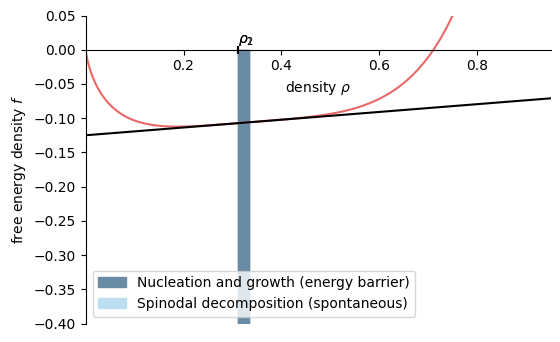

In [10]:
def f_vdw_doubleprime(rho, a, b):
    """
    Calculates the second derivative of the free energy density for a
    Van der Waals fluid.
    """
    return kbt/(rho*(1-b*rho)) + kbt*b/(1-b*rho)**2 - 2*a

## Find points where the second derivative is zero.
rho_turningpoints = fsolve(f_vdw_doubleprime, x0=[0.1, 0.5], args=(a,b))

fig3, ax = plt.subplots(figsize=(6,4))

# Put axes on the zeros
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove label at 0.0
ax.set_xticks([0.2, 0.4, 0.6, 0.8])

# Fill areas
ax.fill([rhosol[0], rhosol[0], rho_turningpoints[0], rho_turningpoints[0]],
        [0, -0.4, -0.4, 0],
        color=nucleatn_color,
        label='Nucleation and growth (energy barrier)')
ax.fill([rho_turningpoints[0], rho_turningpoints[0], rho_turningpoints[1], rho_turningpoints[1]],
        [0, -0.4, -0.4, 0],
        color=spinodal_color,
        label='Spinodal decomposition (spontaneous)')
ax.fill([rho_turningpoints[1], rho_turningpoints[1], rhosol[1], rhosol[1]],
      [0, -0.4, -0.4, 0],
      color=nucleatn_color)

# Plot the graphs
ax.plot(rho, f_vdw(rho, a, b), color=line)
ax.plot(rho, f_mix(rho, a, b), 'k')

# Create markers for rho1 and rho2
ax.scatter(rhosol[0], 0, color='k', marker='|', zorder=10)
ax.scatter(rhosol[1], 0, color='k', marker='|', zorder=10)
ax.text(rhosol[0], 0.01, r'$\rho_1$', zorder=10)
ax.text(rhosol[1], 0.01, r'$\rho_2$', zorder=10)

# Labels
ax.set_xlabel(r'density $\rho$'), ax.set_ylabel(r'free energy density $f$')

# Limits
ax.set_xlim([0, rho[-1]])
ax.set_ylim([-0.4, 0.05])

ax.legend(loc='lower left')

# Save graph to load in figure later (special Jupyter Book feature)
glue("free_energy_density_separation_regimes", fig3, display=False)

In [11]:


range_a = np.arange(27.0/8.0, 5, 0.1)

## Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

# Add traces, one for each slider step
for a in range_a:
    rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.7], args=(a,b))
    rho_turningpoints = fsolve(f_vdw_doubleprime, x0=[0.1, 0.5], args=(a,b))    
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=[rhosol[0], rhosol[0], rho_turningpoints[0], rho_turningpoints[0]],
            y=[0, -1, -1, 0],
            fill="toself",
            mode='lines',
            name='nucleation and growth',
            line=dict(color=nucleatn_color)))
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=[rho_turningpoints[1], rho_turningpoints[1], rhosol[1], rhosol[1]],
            y=[0, -1, -1, 0],
            fill="toself",
            mode='lines',
            name='nucleation and growth',
            line=dict(color=nucleatn_color),
            showlegend=False))    
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=[rho_turningpoints[0], rho_turningpoints[0], rho_turningpoints[1], rho_turningpoints[1]],
            y=[0, -1, -1, 0],
            fill="toself",
            mode='lines',
            name='spinodal decomposition',
            line=dict(color=spinodal_color)))    
    fig.add_trace(        
        go.Scatter(
            visible=False,
            x=rho,
            y=f_vdw(rho, a, b),
            line=dict(color=line),
            mode='lines',
            name='VdW fluid'))
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=rho,
            y=f_mix(rho, a, b),
            line=dict(color='#000000'),
            mode='lines',
            name='phase separated'))

traces_per_step = 5 # Number of traces per value of a

# Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 5
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

# Create and add slider
steps = []
for i in range(0, range_a.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=round(range_a[i], 1)
    )
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": "a/b: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(title_text=r'density $\rho$', range=[rho[0], rho[-1]])

# Update yaxis properties
fig.update_yaxes(title_text=r'free energy density $f$', range=[-1, 0])

fig